In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

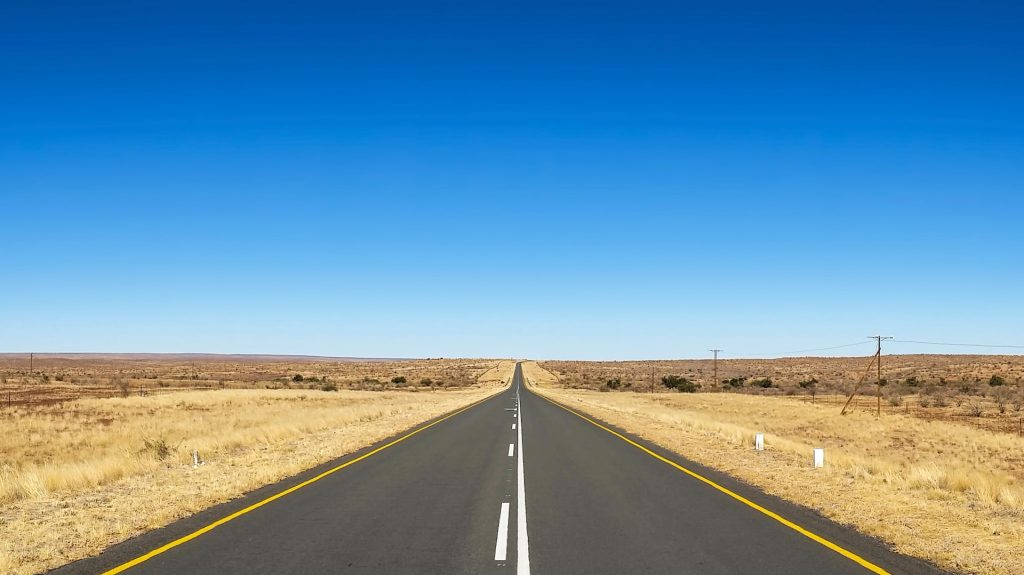

In [3]:
image=cv2.imread("/Road_lane.jpg")
cv2_imshow(image)

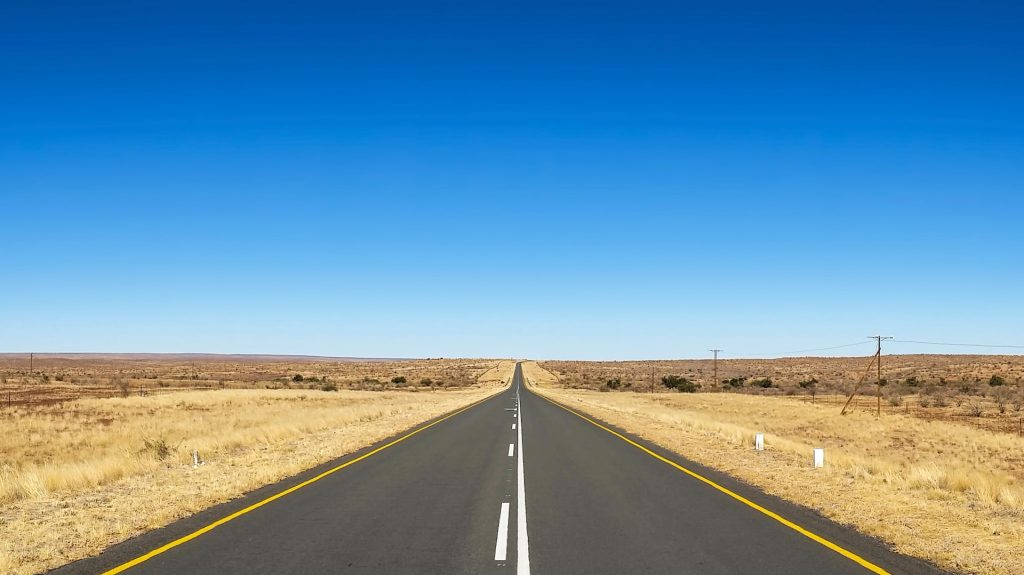

In [4]:
image_lane=np.copy(image)
cv2_imshow(image_lane)

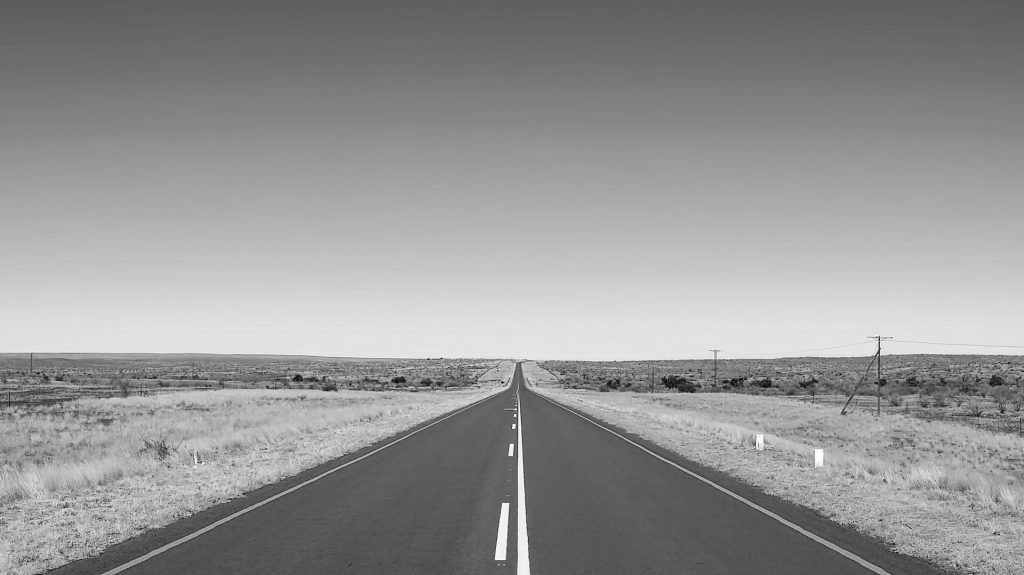

In [7]:
gray_lane=cv2.cvtColor(image_lane,cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_lane)

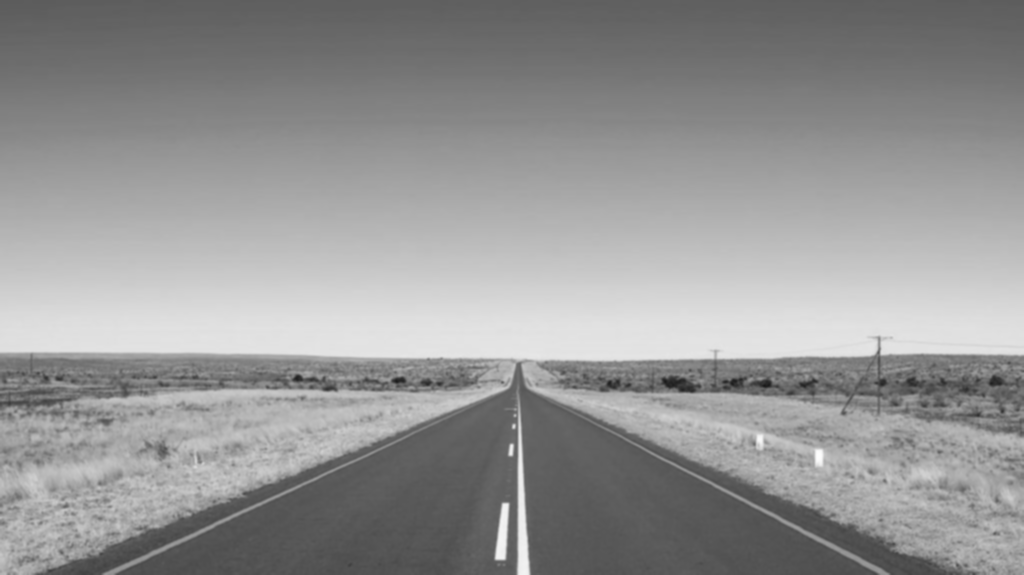

In [8]:
blur_lane=cv2.GaussianBlur(gray_lane,(5,5),0)
cv2_imshow(blur_lane)

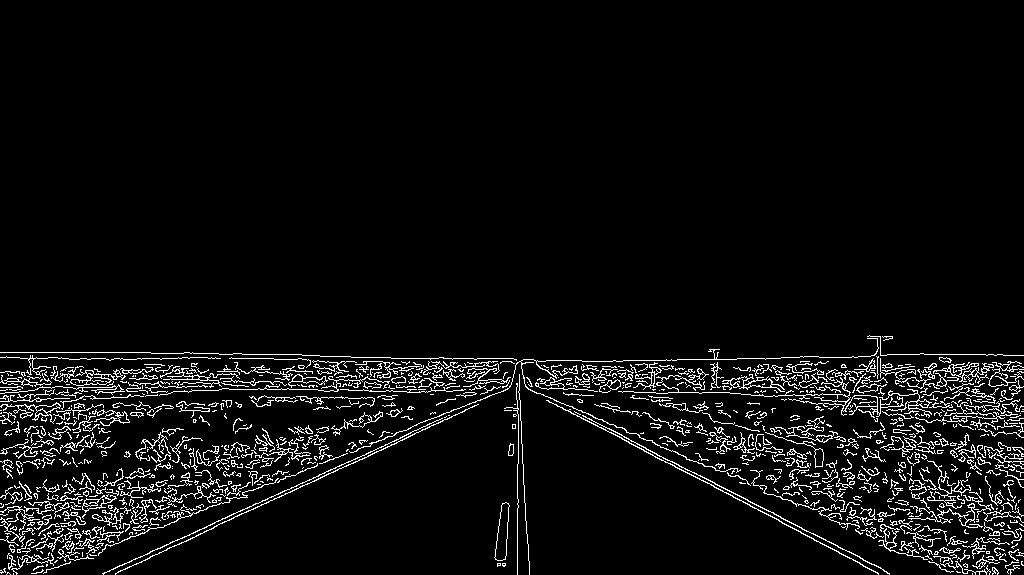

In [11]:
Canny_lane1=cv2.Canny(blur_lane,40,80)
cv2_imshow(Canny_lane1)

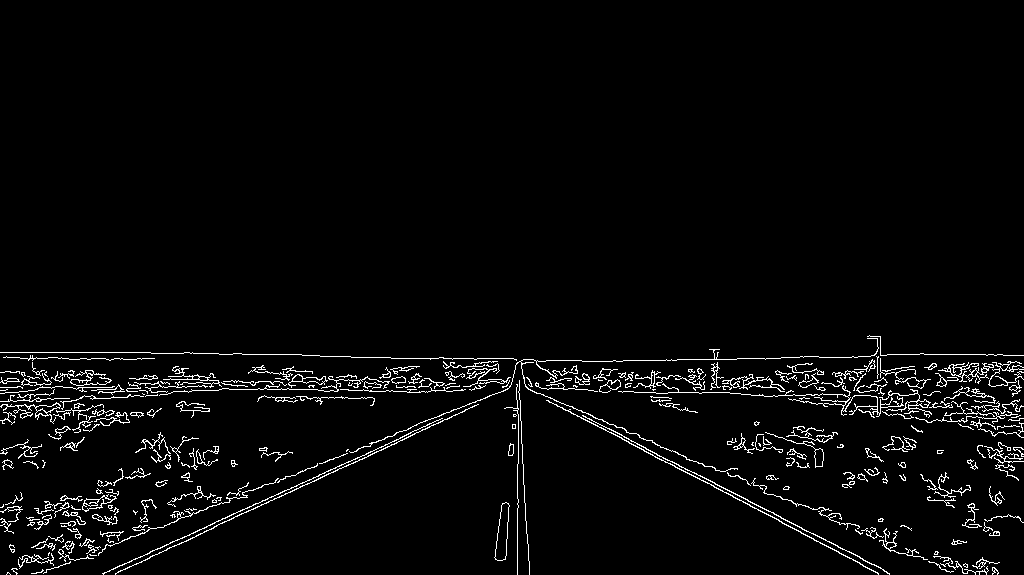

In [12]:
canny_lane2=cv2.Canny(blur_lane,50,150)
cv2_imshow(canny_lane2)

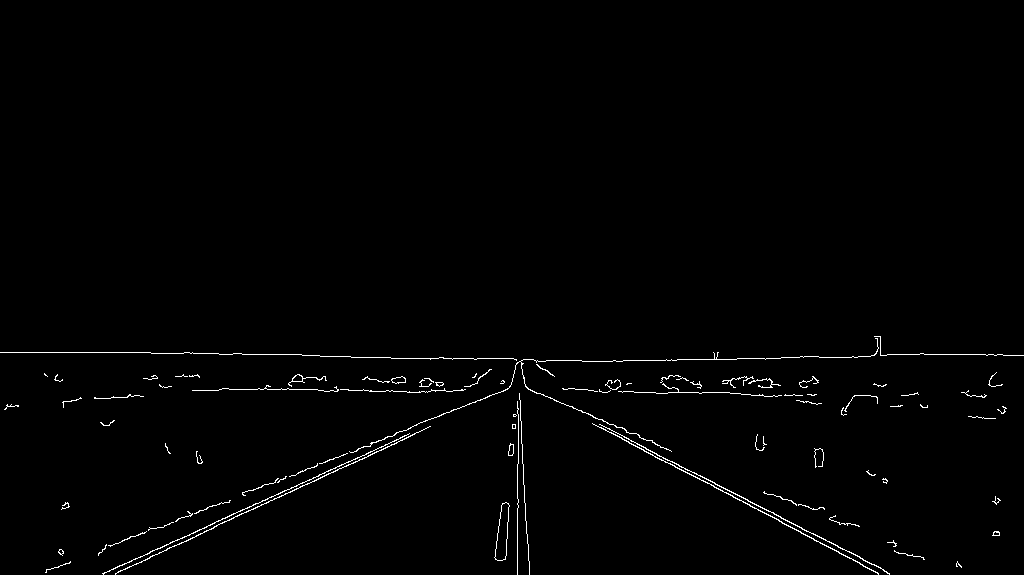

In [14]:
canny_lane3=cv2.Canny(blur_lane,130,250)
cv2_imshow(canny_lane3)

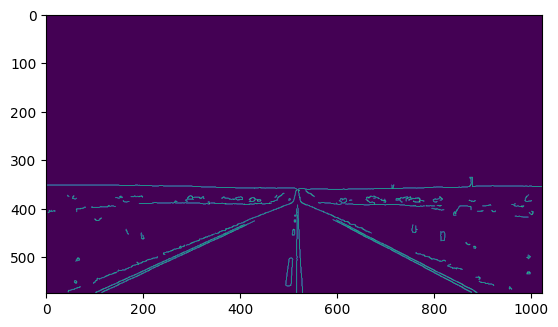

In [16]:
plt.imshow(canny_lane3)
plt.show()

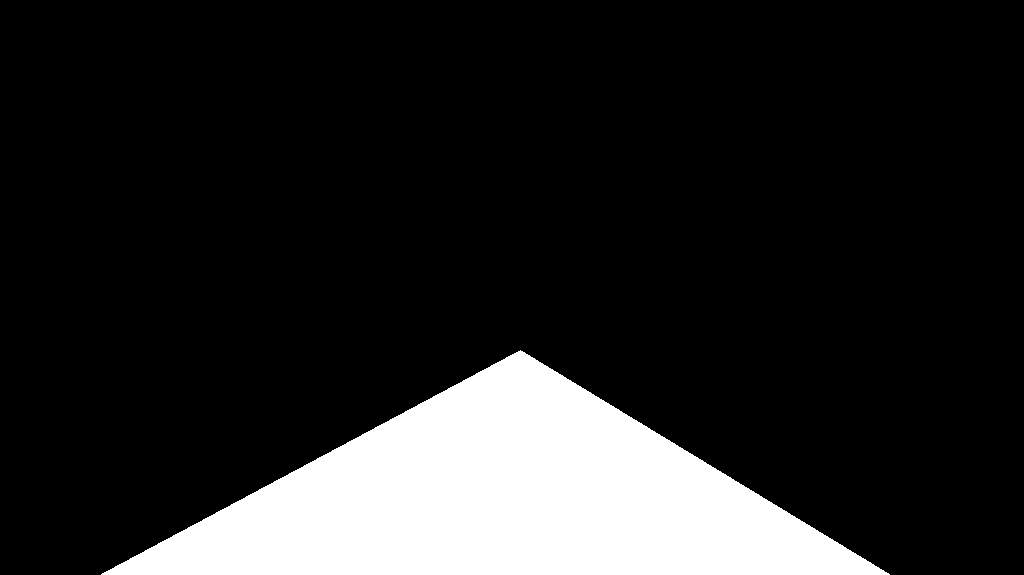

In [21]:
def region_of_interest(image):
  height=image.shape[0]
  polygon=np.array([[(100,height),(890,height),(520,350)]])
  mask=np.zeros_like(image)
  cv2.fillPoly(mask,polygon,255)
  return mask
croppedImage1=cv2_imshow(region_of_interest(canny_lane3))

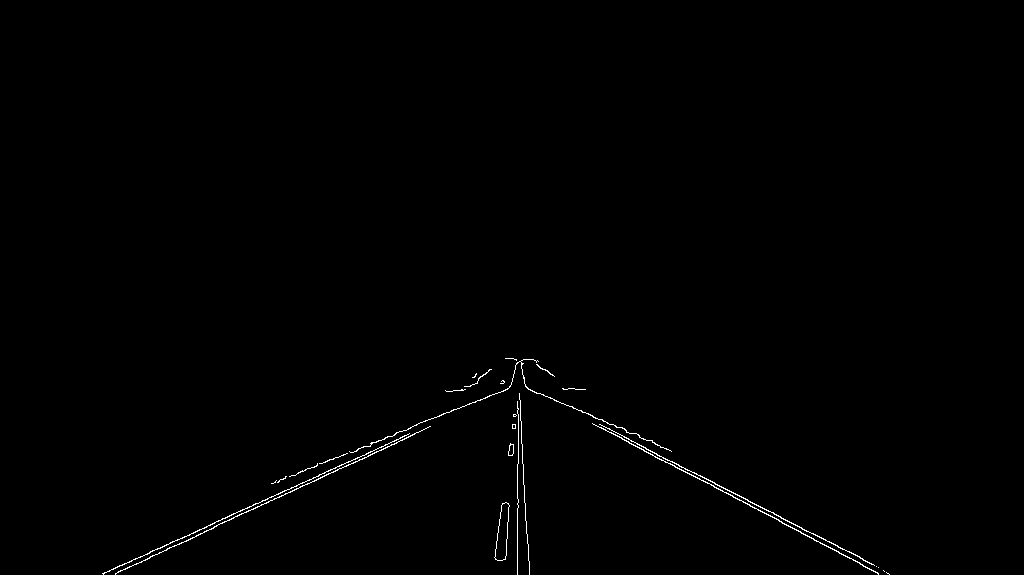

In [25]:
def region_of_interest(image):
  height=image.shape[0]
  polygon=np.array([[(100,height),(890,height),(520,350)]])
  mask=np.zeros_like(image)
  cv2.fillPoly(mask,polygon,255)
  masked_image=cv2.bitwise_and(image,mask)
  return masked_image
croppedImage2=region_of_interest(canny_lane3)
cv2_imshow(croppedImage2)

In [24]:
def display(image,lines):
  line_image=np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2=line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
  return line_image

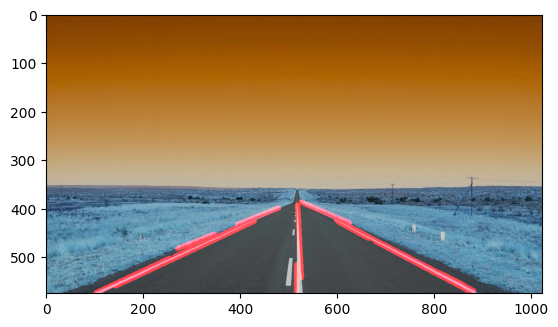

In [26]:
rho=2
theta=np.pi/180
threshold=100
min_line_length=40
max_line_gap=5
line_image=np.copy(image)*0

lines=cv2.HoughLinesP(croppedImage2,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)

for line in lines:
  for x1,y1,x2,y2 in line:
    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
line_image=display(image_lane,lines)
lines_edges=cv2.addWeighted(image_lane,0.8,line_image,1,1)
plt.imshow(lines_edges)
plt.show()

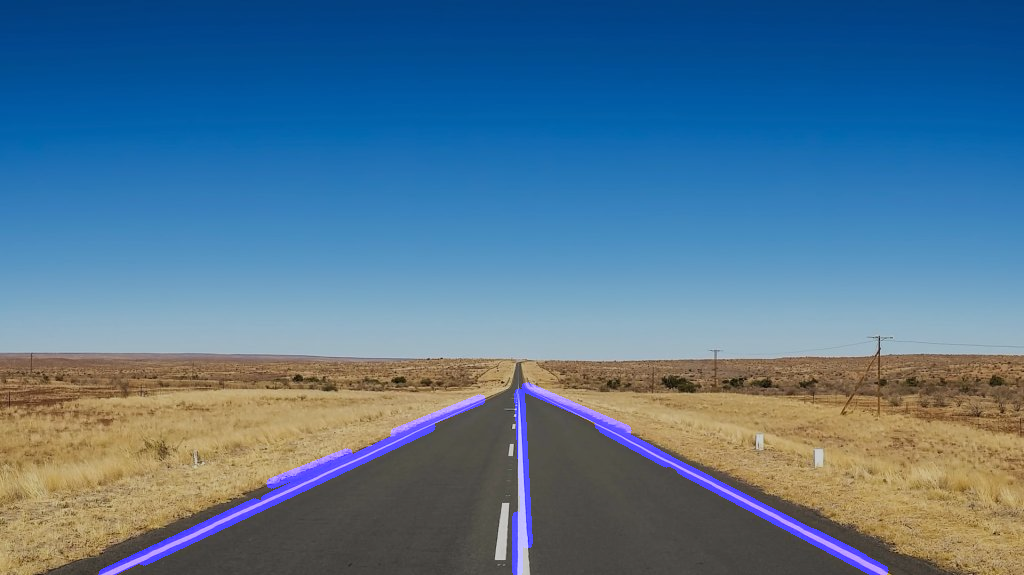

In [27]:
cv2_imshow(lines_edges)